In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
Y = pd.Series(dry_bean.data.targets.squeeze(), name="Class")
  
# metadata 
print(dry_bean.metadata) 
  
# variable information 
print(dry_bean.variables) 


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'ID': 244, 'type': 'NATIVE', 'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'venue': 'Co

In [7]:
print(X)
print(Y)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0      28395    610.291       208.178117       173.888747     1.197191   
1      28734    638.018       200.524796       182.734419     1.097356   
2      29380    624.110       212.826130       175.931143     1.209713   
3      30008    645.884       210.557999       182.516516     1.153638   
4      30140    620.134       201.847882       190.279279     1.060798   
...      ...        ...              ...              ...          ...   
13606  42097    759.696       288.721612       185.944705     1.552728   
13607  42101    757.499       281.576392       190.713136     1.476439   
13608  42139    759.321       281.539928       191.187979     1.472582   
13609  42147    763.779       283.382636       190.275731     1.489326   
13610  42159    772.237       295.142741       182.204716     1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0          0.549812       2871

In [8]:
print(X.info())
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB
None
       

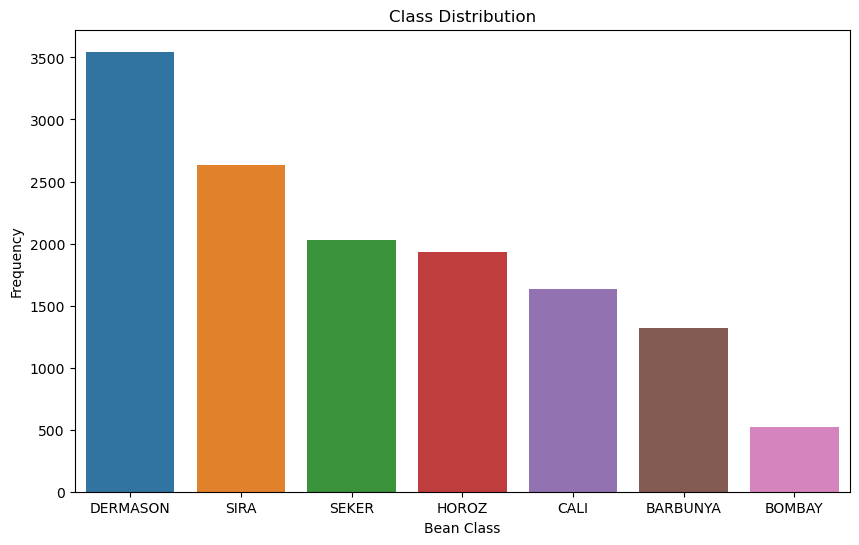

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x=Y, order=Y.value_counts().index)
plt.title("Class Distribution")
plt.xlabel("Bean Class")
plt.ylabel("Frequency")
plt.show()

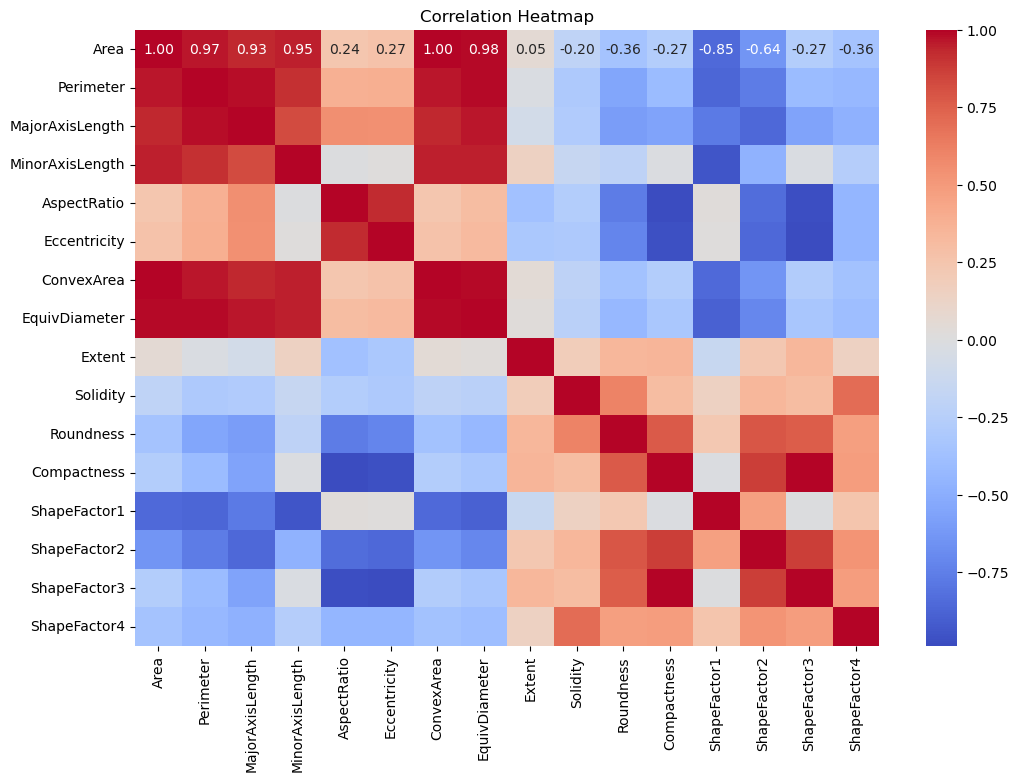

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
print(X_scaled)

           Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0     -0.840749  -1.143319        -1.306598        -0.631153    -1.565053   
1     -0.829188  -1.013924        -1.395911        -0.434445    -1.969784   
2     -0.807157  -1.078829        -1.252357        -0.585735    -1.514291   
3     -0.785741  -0.977215        -1.278825        -0.439290    -1.741618   
4     -0.781239  -1.097384        -1.380471        -0.266663    -2.117993   
...         ...        ...              ...              ...          ...   
13606 -0.373471  -0.446083        -0.366669        -0.363055    -0.123703   
13607 -0.373334  -0.456336        -0.450053        -0.257015    -0.432979   
13608 -0.372038  -0.447833        -0.450478        -0.246456    -0.448618   
13609 -0.371765  -0.427029        -0.428974        -0.266742    -0.380735   
13610 -0.371356  -0.387557        -0.291736        -0.446224     0.148374   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundne

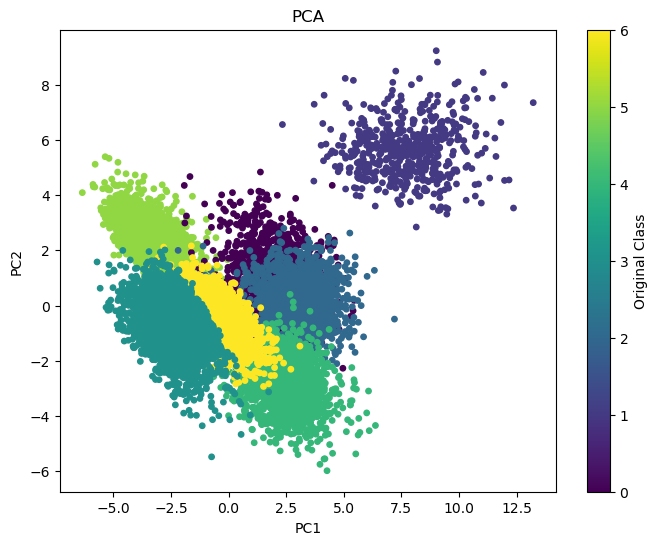

In [17]:
X_centered = X_scaled - X_scaled.mean()
cov_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
X_pca = X_centered @ eigenvectors[:, :2]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=Y.astype('category').cat.codes, cmap='viridis', s=15)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Original Class")
plt.show()